In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import math
import missingno as msno
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_dataset(dataset,table):
    #load the csv.gz file with name table in directory dataset
    return pd.read_csv(f'datasets/{dataset}/{table}.csv.gz',compression='gzip')

df_notes = load_dataset('mimiciii/1.4','NOTEEVENTS')
df_admissions = load_dataset('mimiciii/1.4','ADMISSIONS')
df_patients = load_dataset('mimiciii/1.4','PATIENTS')

# #save df to csv
# df.to_csv('datasets/mimiciii/1.4/NOTEEVENTS.csv',index=False)
# #pickle save df
# df.to_pickle('datasets/mimiciii/1.4/NOTEEVENTS.pkl')


/var/folders/q1/h8sfffrj2ns04crg9tlwvvjh0000gn/T/ipykernel_33180/1941302255.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f'datasets/{dataset}/{table}.csv.gz',compression='gzip')


In [3]:
#load in df_sbdh MIMIC-SBDH.csv
df_sbdh = pd.read_csv('MIMIC-SBDH.csv')

In [4]:
display(df_notes.head)
display(df_notes.columns)

<bound method NDFrame.head of           ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE            CHARTTIME  \
0            174       22532  167853.0  2151-08-04                  NaN   
1            175       13702  107527.0  2118-06-14                  NaN   
2            176       13702  167118.0  2119-05-25                  NaN   
3            177       13702  196489.0  2124-08-18                  NaN   
4            178       26880  135453.0  2162-03-25                  NaN   
...          ...         ...       ...         ...                  ...   
2083175  2070657       31097  115637.0  2132-01-21  2132-01-21 03:27:00   
2083176  2070658       31097  115637.0  2132-01-21  2132-01-21 09:50:00   
2083177  2070659       31097  115637.0  2132-01-21  2132-01-21 16:42:00   
2083178  2070660       31097  115637.0  2132-01-21  2132-01-21 18:05:00   
2083179  2070661       31097  115637.0  2132-01-21  2132-01-21 18:05:00   

                   STORETIME           CATEGORY DESCRIPTION     CGID 

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT'],
      dtype='object')

In [5]:
display(df_notes['CHARTTIME'])
display(df_notes['CHARTDATE'])

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
                  ...         
2083175    2132-01-21 03:27:00
2083176    2132-01-21 09:50:00
2083177    2132-01-21 16:42:00
2083178    2132-01-21 18:05:00
2083179    2132-01-21 18:05:00
Name: CHARTTIME, Length: 2083180, dtype: object

0          2151-08-04
1          2118-06-14
2          2119-05-25
3          2124-08-18
4          2162-03-25
              ...    
2083175    2132-01-21
2083176    2132-01-21
2083177    2132-01-21
2083178    2132-01-21
2083179    2132-01-21
Name: CHARTDATE, Length: 2083180, dtype: object

In [6]:
display(df_patients.head)
display(df_patients.columns)

<bound method NDFrame.head of        ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
0         234         249      F  2075-03-13 00:00:00                  NaN   
1         235         250      F  2164-12-27 00:00:00  2188-11-22 00:00:00   
2         236         251      M  2090-03-15 00:00:00                  NaN   
3         237         252      M  2078-03-06 00:00:00                  NaN   
4         238         253      F  2089-11-26 00:00:00                  NaN   
...       ...         ...    ...                  ...                  ...   
46515   31840       44089      M  2026-05-25 00:00:00                  NaN   
46516   31841       44115      F  2124-07-27 00:00:00                  NaN   
46517   31842       44123      F  2049-11-26 00:00:00  2135-01-12 00:00:00   
46518   31843       44126      F  2076-07-25 00:00:00                  NaN   
46519   31844       44128      M  2098-07-25 00:00:00                  NaN   

                  DOD_HOSP DOD_SS

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object')

In [7]:
display(df_admissions.head)
display(df_admissions.columns)

<bound method NDFrame.head of        ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0          21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1          22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2          23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3          24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4          25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   
...       ...         ...      ...                  ...                  ...   
58971   58594       98800   191113  2131-03-30 21:13:00  2131-04-02 15:02:00   
58972   58595       98802   101071  2151-03-05 20:00:00  2151-03-06 09:10:00   
58973   58596       98805   122631  2200-09-12 07:15:00  2200-09-20 12:08:00   
58974   58597       98813   170407  2128-11-11 02:29:00  2128-12-22 13:11:00   
58975   58598       98813   190264  2131-10-25 03:09:00  2131-10-26 17:44:00   

         

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [8]:
admission_cols = ['HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA']
df_admissions_truncated = df_admissions[admission_cols]

#merge df_admissions_truncated w.r.t. HADM_ID to df_notes
df_notes_admissions = pd.merge(df_notes, df_admissions_truncated, on='HADM_ID')

In [9]:
patient_cols = ['SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG']
df_patients_truncated = df_patients[patient_cols]

#merge df_patients_truncated w.r.t. SUBJECT_ID to df_notes_admissions
df_notes_admissions_patients = pd.merge(df_notes_admissions, df_patients_truncated, on='SUBJECT_ID')

#rename "TEXT" column to "mimiciii_noteevents_text"
df_notes_admissions_patients.rename(columns={'TEXT':'mimiciii_noteevents_text'},inplace=True)

#rename "ROW_ID" column to "row_id"
df_notes_admissions_patients.rename(columns={'ROW_ID':'row_id'},inplace=True)

In [10]:
display(df_notes_admissions_patients.head)
display(df_notes_admissions_patients.columns)

<bound method NDFrame.head of           row_id  SUBJECT_ID   HADM_ID   CHARTDATE            CHARTTIME  \
0            174       22532  167853.0  2151-08-04                  NaN   
1            170       22532  167853.0  2151-08-04                  NaN   
2          59795       22532  167853.0  2151-08-02                  NaN   
3          59796       22532  167853.0  2151-07-19                  NaN   
4         106289       22532  167853.0  2151-08-03                  NaN   
...          ...         ...       ...         ...                  ...   
1851339  2077236       31790  132855.0  2164-09-15  2164-09-15 03:37:00   
1851340  2079379       32151  115098.0  2199-09-22  2199-09-22 21:15:00   
1851341  2079380       32151  115098.0  2199-09-22  2199-09-22 21:22:00   
1851342  2075452       31655  175166.0  2148-07-25  2148-07-25 21:51:00   
1851343  2075453       31655  175166.0  2148-07-25  2148-07-25 22:24:00   

                   STORETIME           CATEGORY DESCRIPTION     CGID 

Index(['row_id', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR',
       'mimiciii_noteevents_text', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME',
       'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION',
       'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY',
       'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'HAS_CHARTEVENTS_DATA', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object')

In [11]:
display(df_sbdh.columns)

Index(['row_id', 'sdoh_community_present', 'sdoh_community_absent',
       'sdoh_education', 'sdoh_economics', 'sdoh_environment',
       'behavior_alcohol', 'behavior_tobacco', 'behavior_drug'],
      dtype='object')

In [25]:
#merge df_notes_admissions_patients w.r.t. note_id to df_sbdh
df_merged = df_sbdh.merge(df_notes_admissions_patients, how='left', on='row_id')

display(df_merged.head)
display(df_merged.columns)

#save df_merged to csv
df_merged.to_csv('MIMIC-SBDH-merged.csv',index=False)

<bound method NDFrame.head of       row_id  sdoh_community_present  sdoh_community_absent  sdoh_education  \
0          5                       0                      0               0   
1         42                       0                      0               0   
2        136                       1                      0               0   
3        442                       1                      1               0   
4        328                       1                      0               0   
...      ...                     ...                    ...             ...   
7020   58064                       1                      0               1   
7021   58873                       1                      0               0   
7022   58947                       1                      0               1   
7023   58624                       1                      0               0   
7024   59236                       1                      0               0   

      sdoh_economics 

Index(['row_id', 'sdoh_community_present', 'sdoh_community_absent',
       'sdoh_education', 'sdoh_economics', 'sdoh_environment',
       'behavior_alcohol', 'behavior_tobacco', 'behavior_drug', 'SUBJECT_ID',
       'HADM_ID', 'CHARTDATE', 'CHARTTIME', 'STORETIME', 'CATEGORY',
       'DESCRIPTION', 'CGID', 'ISERROR', 'mimiciii_noteevents_text',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG'],
      dtype='object')

<Axes: >

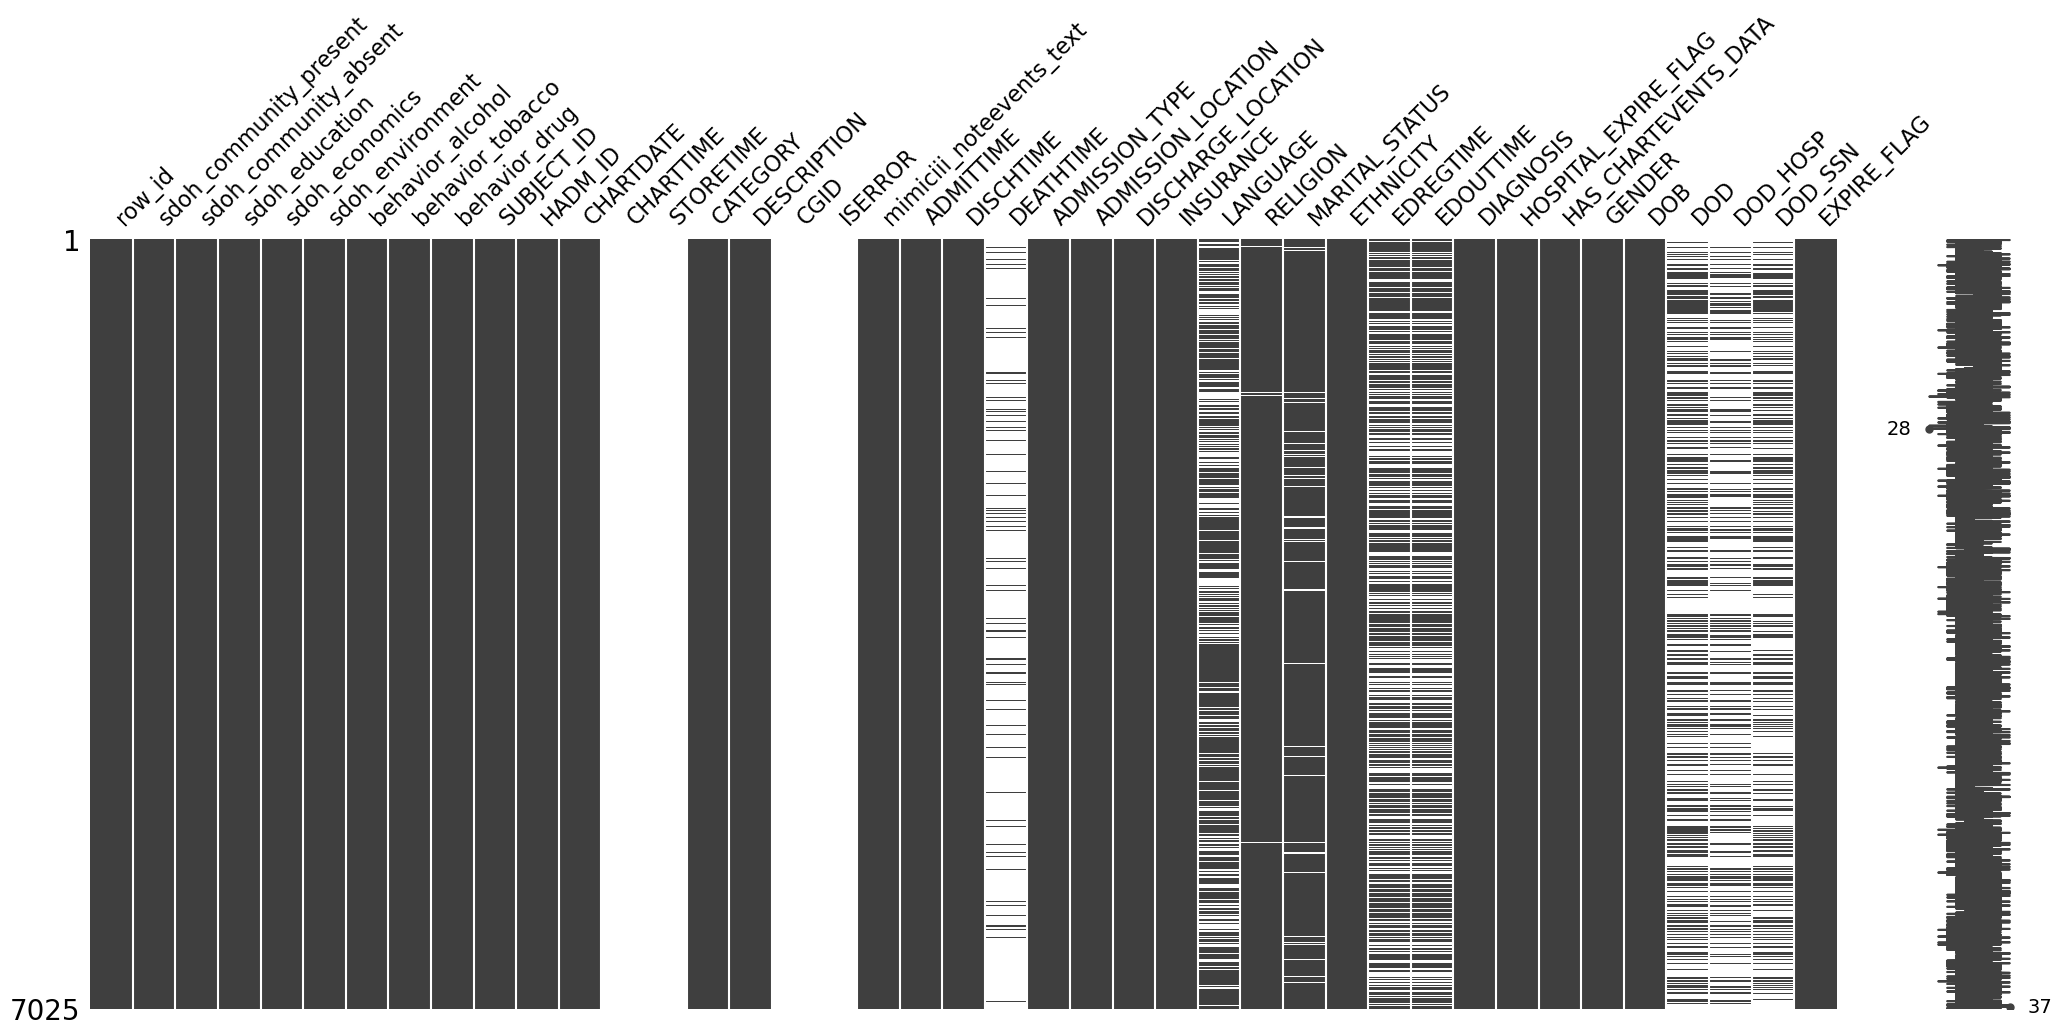

In [26]:
msno.matrix(df_merged)

Demographics Analysis (Pie Charts)

In [33]:
display(df_merged.columns)

Index(['row_id', 'sdoh_community_present', 'sdoh_community_absent',
       'sdoh_education', 'sdoh_economics', 'sdoh_environment',
       'behavior_alcohol', 'behavior_tobacco', 'behavior_drug', 'SUBJECT_ID',
       'HADM_ID', 'CHARTDATE', 'CHARTTIME', 'STORETIME', 'CATEGORY',
       'DESCRIPTION', 'CGID', 'ISERROR', 'mimiciii_noteevents_text',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'AGE'],
      dtype='object')

In [34]:
display(df_merged['LANGUAGE'].unique())

array([nan, 'ENGL', 'CAPE', 'CANT', '**TO', 'RUSS', 'SPAN', 'AMER',
       'PTUN', '*AMH', 'PORT', 'GREE', 'POLI', 'HAIT', '*GUJ', 'PERS',
       'ITAL', 'URDU', 'MAND', 'VIET', 'THAI', '*TAM', '*CHI', 'HIND',
       '*URD', 'CAMB', 'FREN', 'ALBA', '*FIL', '*MAN', 'KORE', '*BEN',
       'JAPA', '*YID', 'LAOT', '*LIT', 'ARAB', 'SOMA'], dtype=object)

In [122]:
#compute age of each agent according admission time minus dob
df_merged['ADMITTIME'] = pd.to_datetime(df_merged['ADMITTIME'])
df_merged['DOB'] = pd.to_datetime(df_merged['DOB'])
df_merged['AGE'] = df_merged['ADMITTIME'].dt.year - df_merged['DOB'].dt.year

# display(df_merged['AGE'].unique())

# display(df_merged['ADMITTIME'])
df_merged.head()

merge_truncation_cols = ['sdoh_community_present','sdoh_community_absent',\
                         'sdoh_environment','behavior_alcohol','row_id','SUBJECT_ID','GENDER','AGE',\
                            'ETHNICITY','MARITAL_STATUS','INSURANCE','LANGUAGE']

df_merged_truncated = df_merged[merge_truncation_cols]


#preprocess sdoh_comunity: let 'sdoh_community' be 1 if either 'sdoh_community_present' or 'sdoh_community_absent' is 1, otherwise 0
df_merged_truncated['sdoh_community'] = (df_merged_truncated['sdoh_community_present'] | df_merged_truncated['sdoh_community_absent']).astype(int)

#preprocess sdoh_environment: let 'sdoh_environment' be 1 if 'sdoh_environment' is not 0, otherwise 0
df_merged_truncated['sdoh_environment'] = (df_merged_truncated['sdoh_environment'] != 0).astype(int)

#preprocess behavior_alcohol: let 'behavior_alcohol' be 1 if 'behavior_alcohol' is not 0, otherwise 0
df_merged_truncated['behavior_alcohol'] = (df_merged_truncated['behavior_alcohol'] != 0).astype(int)

#preprocess age: let 'age' be 0 if age < 65, 1 if age >= 65
df_merged_truncated['AGE'] = (df_merged_truncated['AGE'] < 65).astype(int)
df_merged_truncated['AGE'] = df_merged_truncated['AGE'].replace({0:'>=65',1:'<65'})

#preprocess language: let language be ENGL if is ENGL, otherwise OTHER
df_merged_truncated['LANGUAGE'] = (df_merged_truncated['LANGUAGE'] != 'ENGL').astype(int)
df_merged_truncated['LANGUAGE'] = df_merged_truncated['LANGUAGE'].replace({0:'ENGL',1:'OTHER'})

#preprocess marital_status: let marital_status be MARRIED if is MARRIED, otherwise OTHER
df_merged_truncated['MARITAL_STATUS'] = (df_merged_truncated['MARITAL_STATUS'] == 'MARRIED').astype(int)
df_merged_truncated['MARITAL_STATUS'] = df_merged_truncated['MARITAL_STATUS'].replace({1:'MARRIED',0:'OTHER'})

#preprocess insurance: let insurance be PRIVATE if is PRIVATE, otherwise OTHER
df_merged_truncated['INSURANCE'] = (df_merged_truncated['INSURANCE'] != 'Private').astype(int)
df_merged_truncated['INSURANCE'] = df_merged_truncated['INSURANCE'].replace({1:'OTHER',0:'PRIVATE'})

#preprocess ethnicity: let ethnicity be WHITE if is WHITE, otherwise OTHER
df_merged_truncated['ETHNICITY'] = (df_merged_truncated['ETHNICITY'] == 'WHITE').astype(int)
df_merged_truncated['ETHNICITY'] = df_merged_truncated['ETHNICITY'].replace({0:'OTHER',1:'WHITE'})


#drop 'sdoh_community_present','sdoh_community_absent' columns
df_merged_truncated.drop(columns=['sdoh_community_present','sdoh_community_absent'],inplace=True)


display(df_merged_truncated.head())

,sdoh_environment,behavior_alcohol,row_id,SUBJECT_ID,GENDER,AGE,ETHNICITY,MARITAL_STATUS,INSURANCE,LANGUAGE,sdoh_community
0,0,0,5,9446,F,<65,WHITE,MARRIED,PRIVATE,OTHER,0
1,0,0,42,31502,F,>=65,WHITE,MARRIED,OTHER,ENGL,0
2,1,1,136,2003,M,<65,WHITE,MARRIED,PRIVATE,ENGL,1
3,1,1,442,94982,M,<65,WHITE,OTHER,OTHER,ENGL,1
4,1,1,328,55357,F,<65,OTHER,MARRIED,OTHER,ENGL,1


In [51]:
# display(df_merged.columns)

# sdoh_features = ['sdoh_community_present', 'sdoh_community_absent',
#        'sdoh_education', 'sdoh_economics', 'sdoh_environment',
#        'behavior_alcohol', 'behavior_tobacco', 'behavior_drug']

# demographic_features = [ 'INSURANCE', 'LANGUAGE',
#        'RELIGION', 'MARITAL_STATUS', 'ETHNICITY','GENDER']

sdoh_features = ['sdoh_community', 'sdoh_environment', 'behavior_alcohol']

demographic_features = [ 'INSURANCE', 'LANGUAGE', 'AGE','MARITAL_STATUS', 'ETHNICITY','GENDER']


In [52]:
for sdoh_feature in sdoh_features:
    display(df_merged_truncated[sdoh_feature].value_counts())

for demographic_feature in demographic_features:
    display(df_merged_truncated[demographic_feature].value_counts())

sdoh_community
1    4662
0    2363
Name: count, dtype: int64

sdoh_environment
1    4420
0    2605
Name: count, dtype: int64

behavior_alcohol
1    5368
0    1657
Name: count, dtype: int64

INSURANCE
OTHER      4852
PRIVATE    2173
Name: count, dtype: int64

LANGUAGE
ENGL     4257
OTHER    2768
Name: count, dtype: int64

AGE
1    3673
0    3352
Name: count, dtype: int64

MARITAL_STATUS
OTHER      3685
MARRIED    3340
Name: count, dtype: int64

ETHNICITY
WHITE    5052
OTHER    1973
Name: count, dtype: int64

GENDER
M    3993
F    3032
Name: count, dtype: int64

In [152]:
df_merged_truncated["INSURANCE"]

0       PRIVATE
1         OTHER
2       PRIVATE
3         OTHER
4         OTHER
         ...   
7020    PRIVATE
7021      OTHER
7022      OTHER
7023    PRIVATE
7024      OTHER
Name: INSURANCE, Length: 7025, dtype: object

In [180]:
display(df_merged_truncated)

,sdoh_environment,behavior_alcohol,row_id,SUBJECT_ID,GENDER,AGE,ETHNICITY,MARITAL_STATUS,INSURANCE,LANGUAGE,sdoh_community
0,0,0,5,9446,F,<65,WHITE,MARRIED,PRIVATE,OTHER,0
1,0,0,42,31502,F,>=65,WHITE,MARRIED,OTHER,ENGL,0
2,1,1,136,2003,M,<65,WHITE,MARRIED,PRIVATE,ENGL,1
3,1,1,442,94982,M,<65,WHITE,OTHER,OTHER,ENGL,1
4,1,1,328,55357,F,<65,OTHER,MARRIED,OTHER,ENGL,1
...,...,...,...,...,...,...,...,...,...,...,...
7020,1,0,58064,58466,M,<65,WHITE,OTHER,PRIVATE,ENGL,1
7021,1,1,58873,92195,M,>=65,WHITE,MARRIED,OTHER,ENGL,1
7022,1,0,58947,2483,M,<65,WHITE,OTHER,OTHER,OTHER,1
7023,0,1,58624,26705,M,<65,OTHER,MARRIED,PRIVATE,OTHER,1


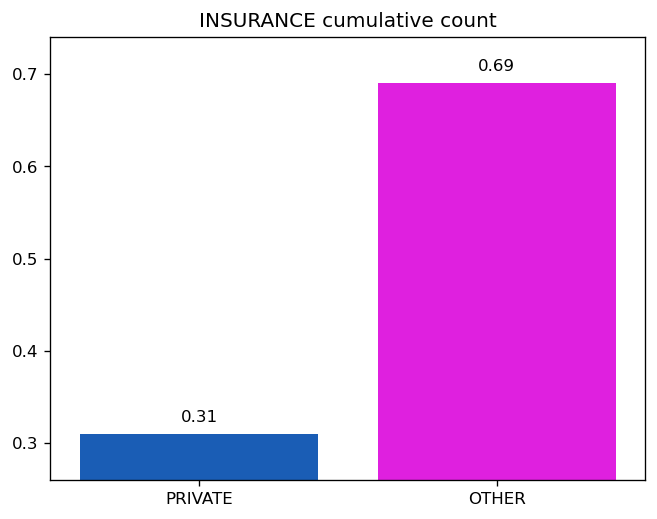

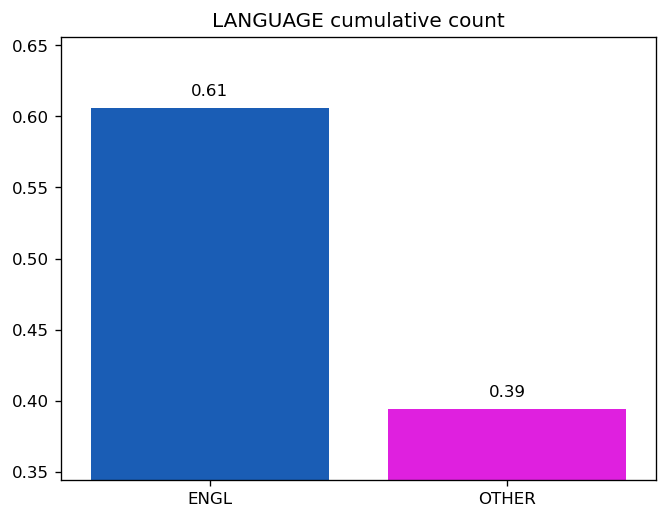

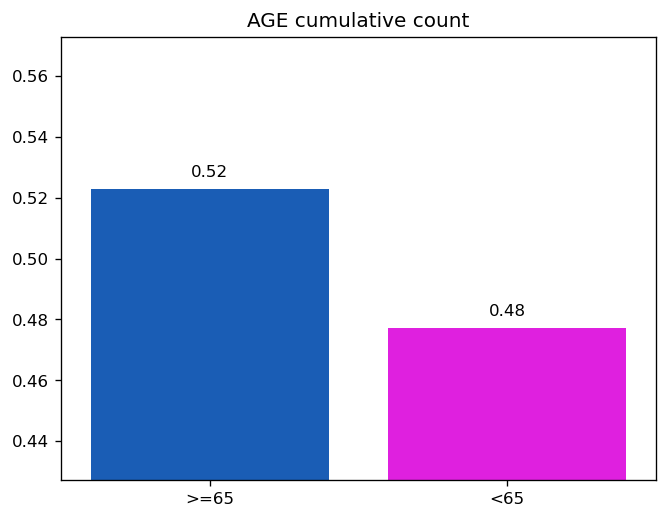

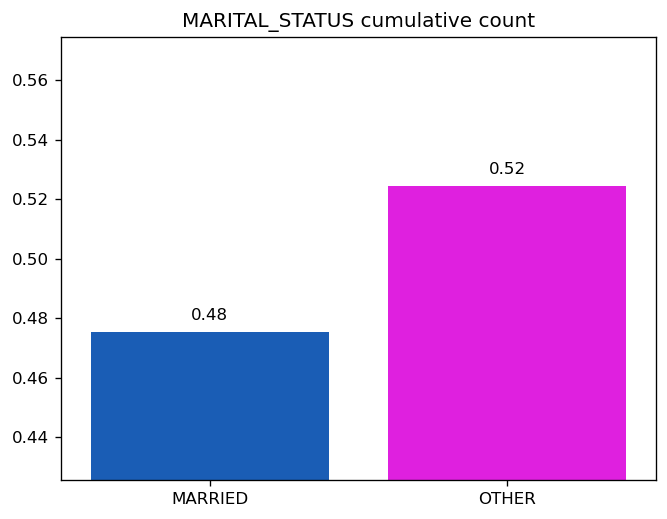

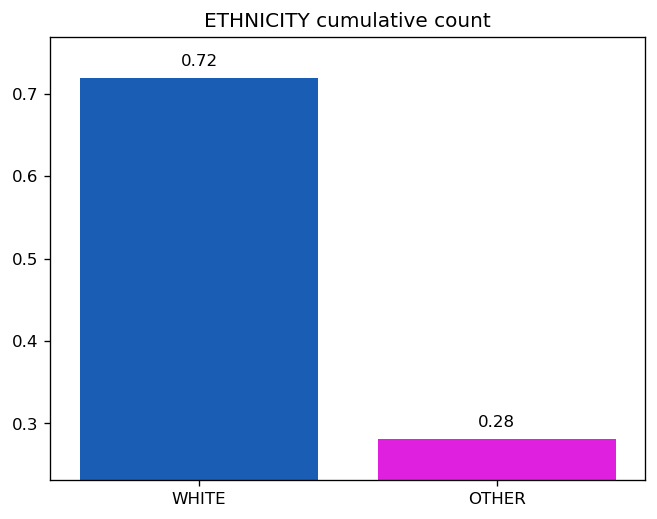

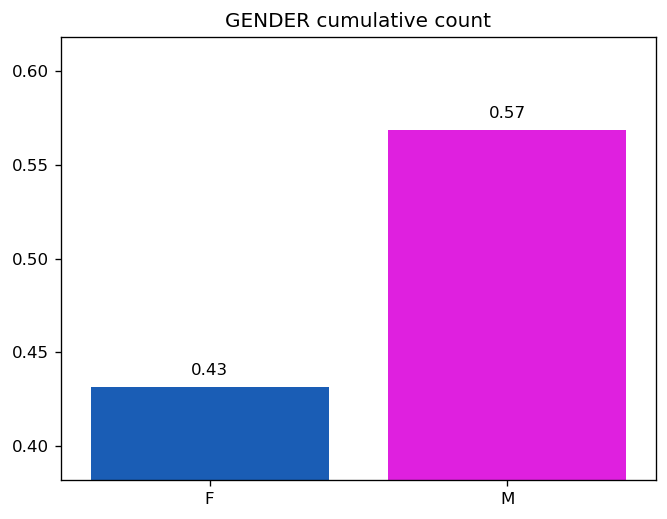

In [202]:
def demographic_count_analysis(df,demographic_features,normalize = False):
    # palette = ["#FF595E","#FFCA3A"]
    palette = ["#0059CF","#FF00FF"]
    
    if normalize == True:
        pass



    for demographic_feature in demographic_features:
        #countplot 
        # plt.figure(figsize=(10,10))
        #do countplot without bars ordered lexicographically
        if demographic_feature == "INSURANCE":
            order = ["PRIVATE","OTHER"]
        elif demographic_feature == "LANGUAGE":
            order = ["ENGL","OTHER"]
        elif demographic_feature == 'MARITAL_STATUS':
            order = ["MARRIED","OTHER"]
        elif demographic_feature == "ETHNICITY":
            order = ["WHITE","OTHER"]
        elif demographic_feature == "AGE":
            order = [">=65","<65"]
        elif demographic_feature == "GENDER":
            order = ["F","M"]




        if normalize:
            df_count = pd.DataFrame()
            for index,value in enumerate(order):
                #every countplot with respect to one sdho feature is put aside of last countplot so they don't overlap

                df_count[value] = [(df[demographic_feature] == value).sum()/df.shape[0]]
                
                    # df_count[sdoh_feature] = [df[indices][sdoh_feature].sum()]
                #countplot for df_count, the bottom of y starts with 0.45
            
            #plot bars of df_count values with respect to each column, write column name at bottom of each bar and set legend
            plt.figure(dpi=120)
            sns.barplot(data=df_count,palette = palette,order = order)
            #annotate value at top of each bar
            for p in plt.gca().patches:
                plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            # plt.xticks()
            plt.title(f'{demographic_feature} cumulative count')

            plt.ylim(df_count.min().min()-0.05,df_count.max().max()+0.05)
            
            plt.savefig(f'figures/normalized_{demographic_feature}_cumulative_count.jpg')


        else:
            sns.countplot(data=df,x=demographic_feature,order = order, palette = palette)
            plt.ylim(max(np.min(df[demographic_feature].value_counts().values)-1000,0),np.max(df[demographic_feature].value_counts().values)+1000)        

            #annotate count on top of bars
            for p in plt.gca().patches:
                plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            plt.title(f'{demographic_feature} cumulative count')


            #save figure
            plt.savefig(f'figures/{demographic_feature}_cumulative_count.jpg')
        plt.show()

demographic_count_analysis(df_merged_truncated,demographic_features,normalize = True)

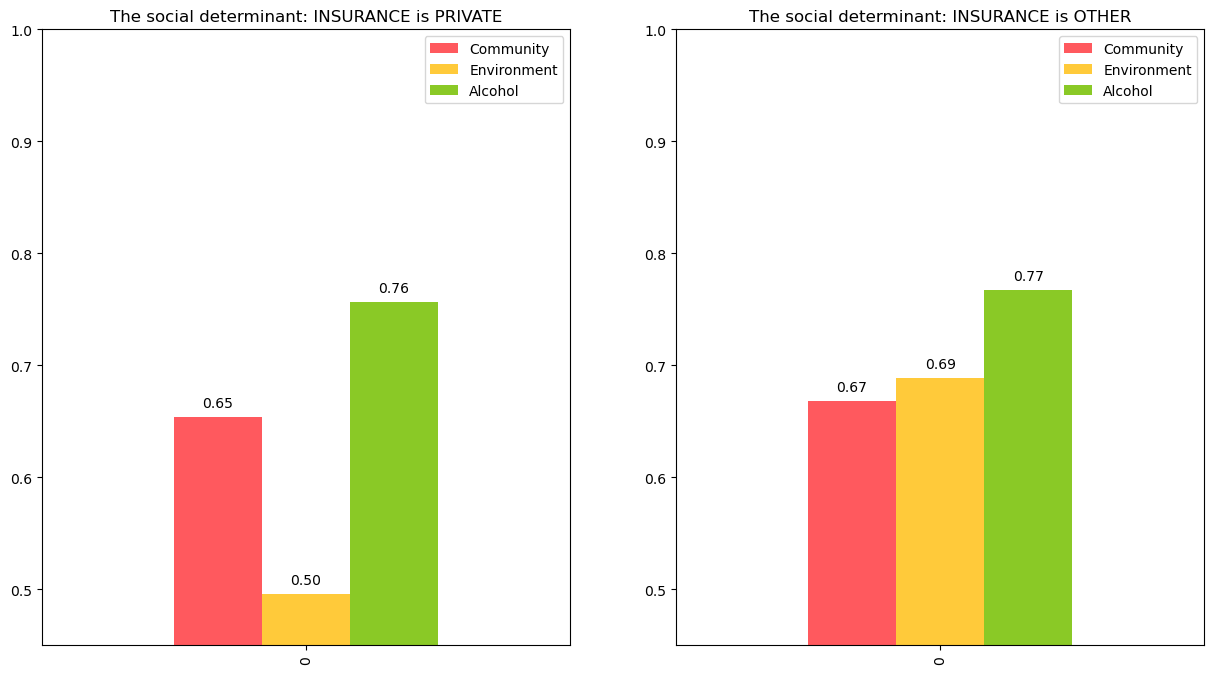

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

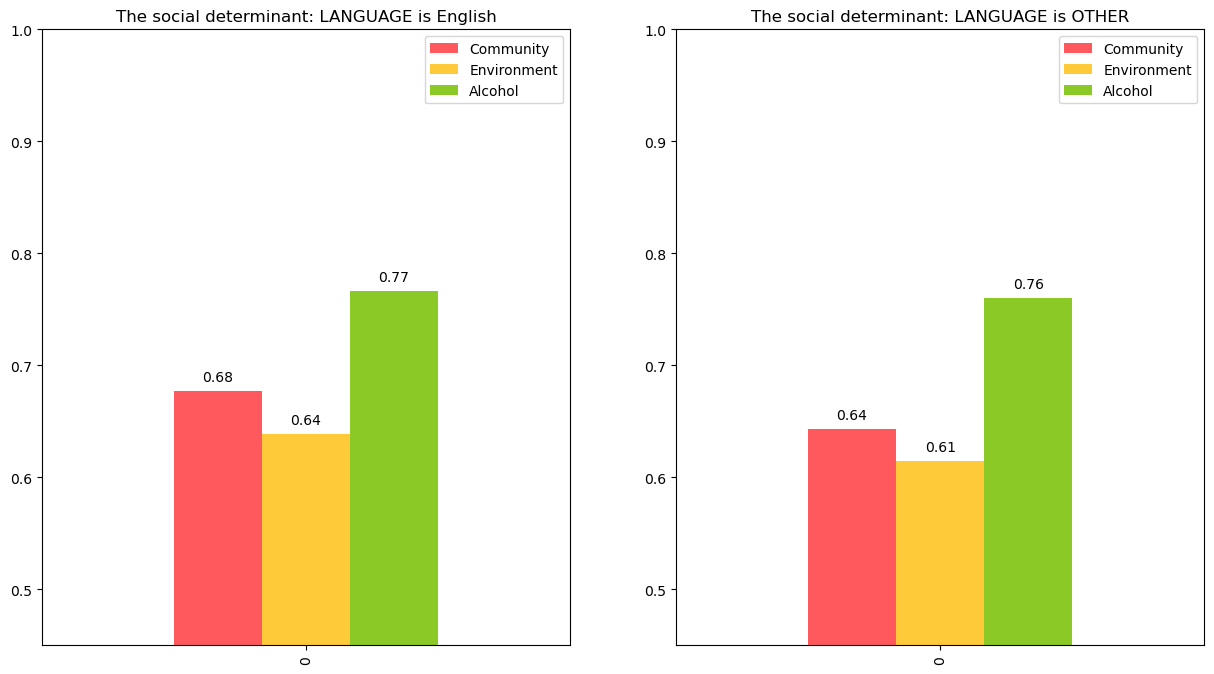

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

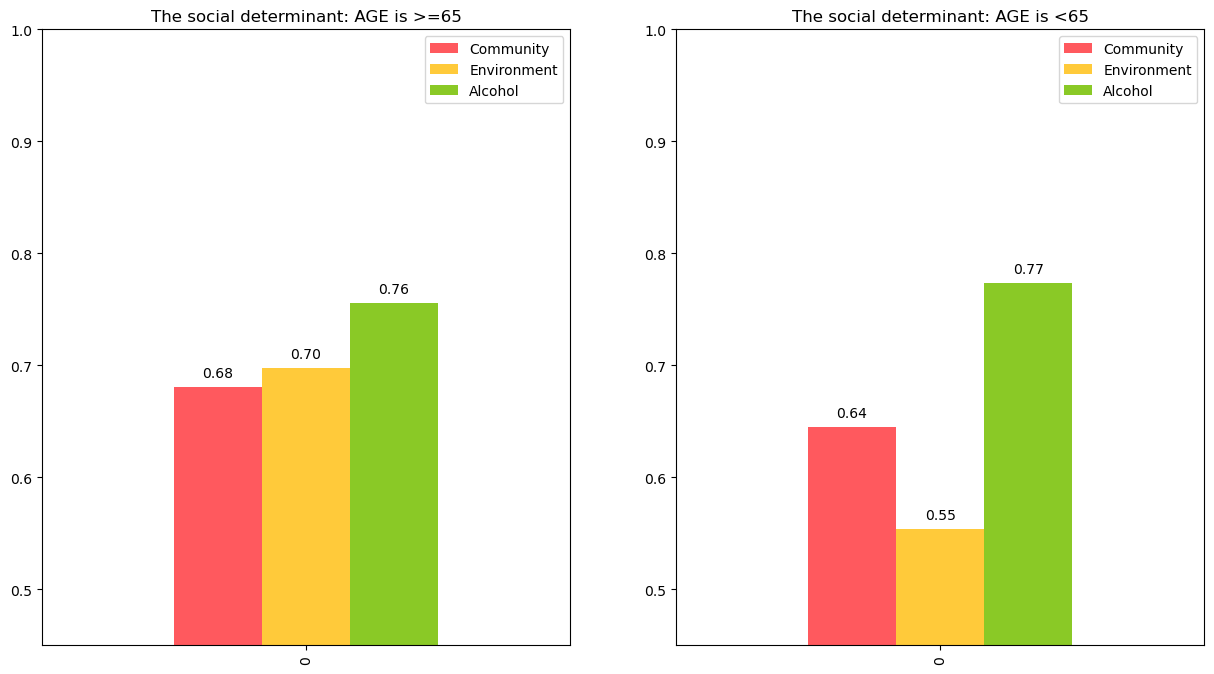

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

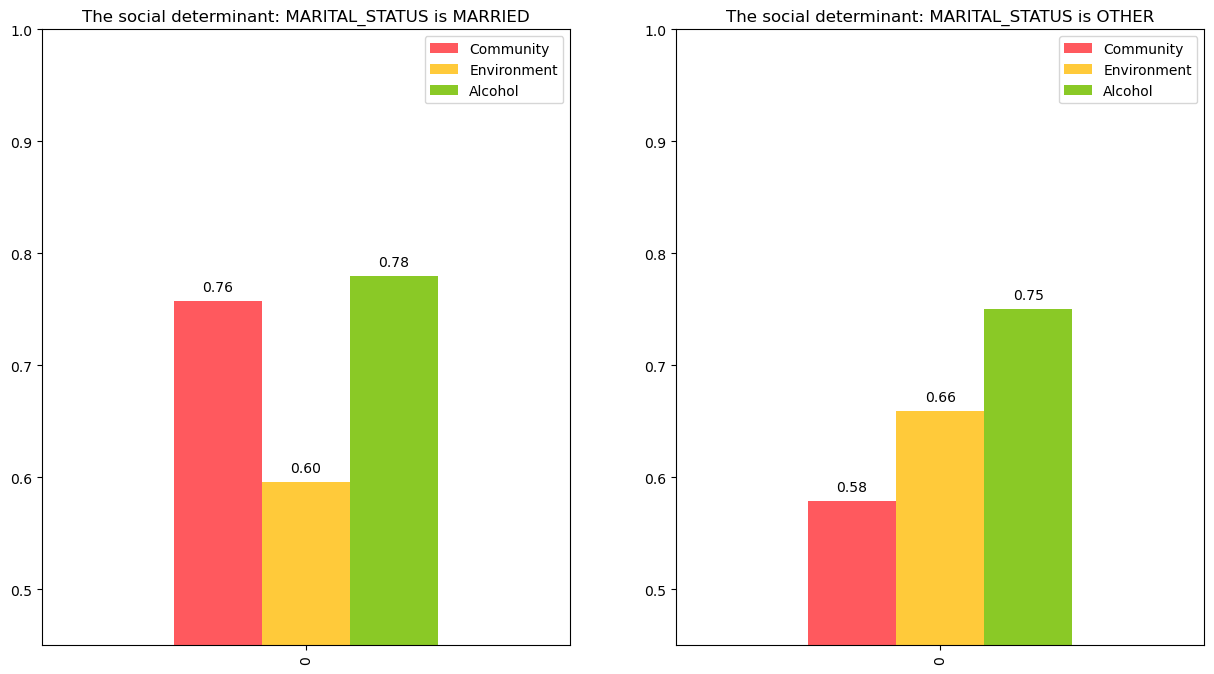

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

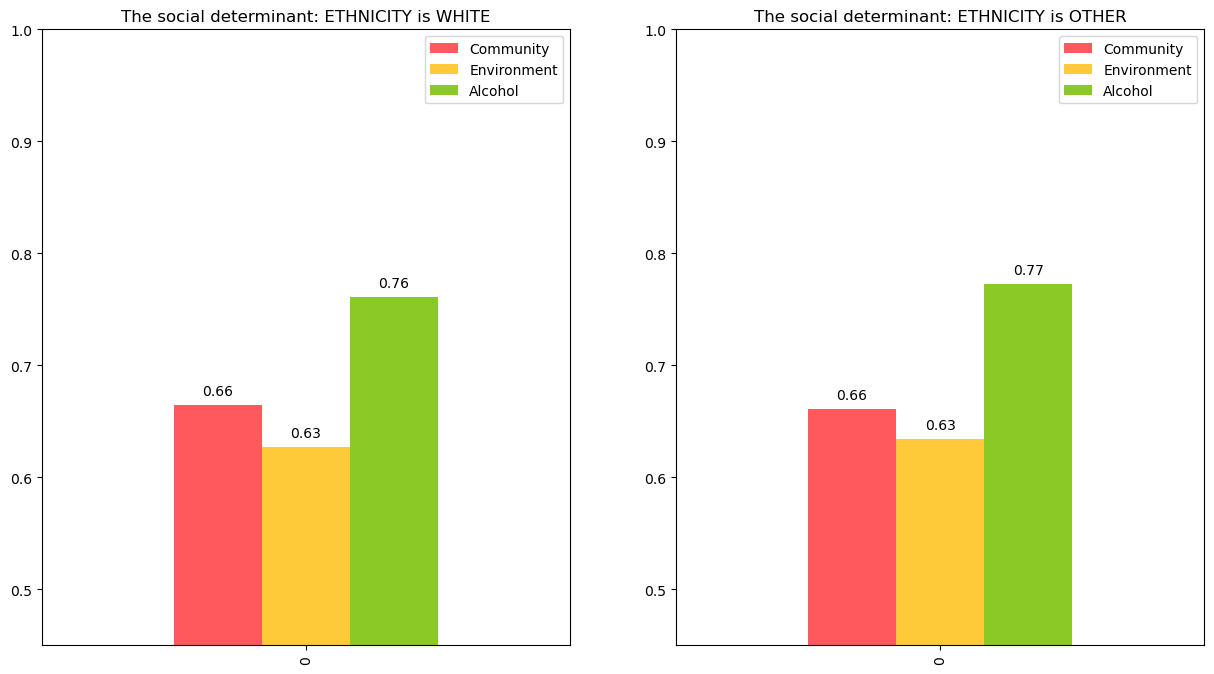

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

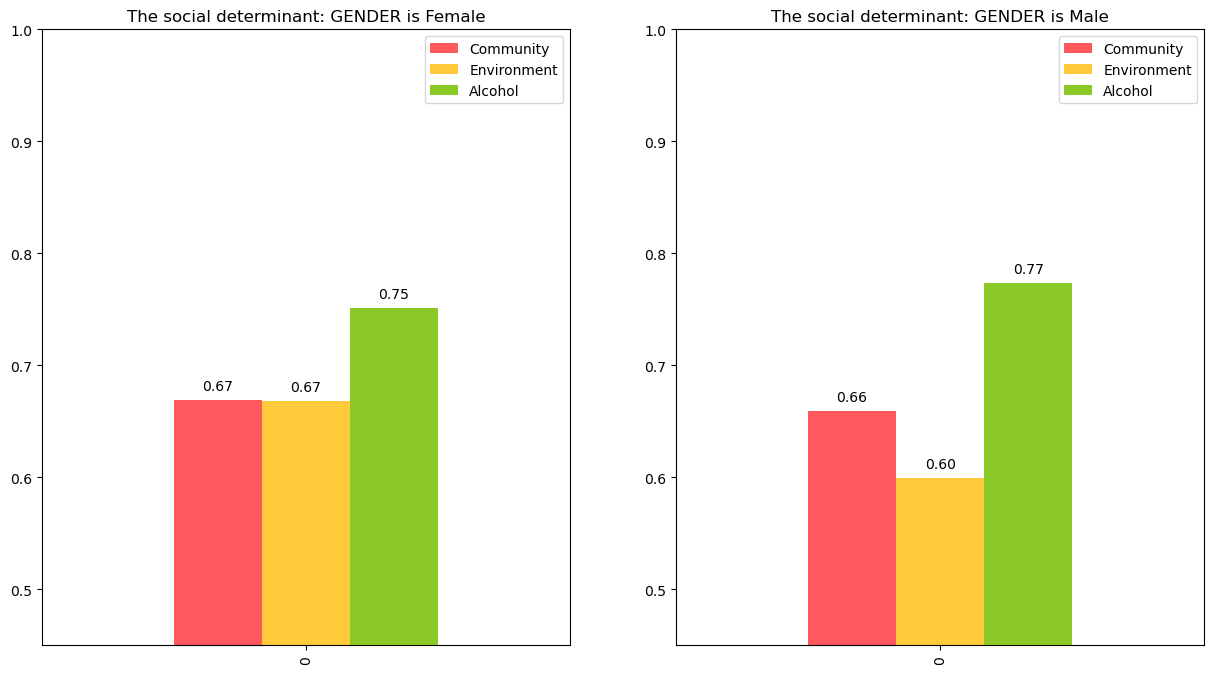

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

In [203]:
def demographic_sdoh_ratio_analysis(df,demographic_features,sdoh_features):
    # palette = ["#6D597A","#B56576","#E34234"]
    palette = ["#FF595E","#FFCA3A","#8AC926"]
    for demographic_feature in demographic_features:
        fig, ax = plt.subplots(1,2,figsize=(15,8))

        if demographic_feature == "INSURANCE":
            order = ["PRIVATE","OTHER"]
        elif demographic_feature == "LANGUAGE":
            order = ["ENGL","OTHER"]
        elif demographic_feature == 'MARITAL_STATUS':
            order = ["MARRIED","OTHER"]
        elif demographic_feature == "ETHNICITY":
            order = ["WHITE","OTHER"]
        elif demographic_feature == "AGE":
            order = [">=65","<65"]
        elif demographic_feature == "GENDER":
            order = ["F","M"]

        for index,value in enumerate(order):
            #every countplot with respect to one sdho feature is put aside of last countplot so they don't overlap
            df_count = pd.DataFrame()

            for sdoh_feature in sdoh_features:
                # display( df[df[demographic_feature]==value][sdoh_feature].sum())

                indices = df[demographic_feature]==value
                if sdoh_feature == "sdoh_community":
                    feature = "Community"
                elif sdoh_feature == "sdoh_environment":
                    feature = "Environment" 
                elif sdoh_feature == "behavior_alcohol":
                    feature = "Alcohol"

                df_count[feature] = [df[indices][sdoh_feature].sum()/indices.sum()]
                # df_count[sdoh_feature] = [df[indices][sdoh_feature].sum()]
            #countplot for df_count, the bottom of y starts with 0.45
            df_count.plot(kind='bar',ax=ax[index],color=palette)

            plt.figure(dpi=120)
            ax[index].set_ylim(0.45,1)

            for p in ax[index].patches:
                #annotate countplot with values on top of bars and sdoh_feature on bottom of bars
                ax[index].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            
            if value == "ENGL":
                value = "English"
            elif value == "F":
                value = "Female"
            elif value == "M":
                value = "Male"
            
            ax[index].set_title(f'The social determinant: {demographic_feature} is {value}')
        fig.savefig(f'figures/{demographic_feature}_sdoh_ratio.jpg')
        plt.show()

demographic_sdoh_ratio_analysis(df_merged_truncated,demographic_features,sdoh_features)

In [73]:
# def demographic_sdoh_ratio_analysis(df,demographic_feature,sdoh_feature,func = sns.barplot, **params):
#     #enumerate through every unique value of demographic_feature, plot a pie chart with respect to sdoh_feature of the elements which has the unique value as its demographic_feature, put the pie chart in a subplot
    
#     # if demographic_feature not in demographic_features:
#     #     raise ValueError(f'{demographic_feature} is not a valid demographic feature')
#     # if sdoh_feature not in sdoh_features:
#     #     raise ValueError(f'{sdoh_feature} is not a valid sdoh feature')
#     palette = {0:'red',1:'blue'}
    
#     demographic_feature_vals = df[demographic_feature].unique()
#     #generate a long list of colors
#     # length_demographic_feature_vals = len(demographic_feature_vals)
#     # fig, axs = plt.subplots(length_demographic_feature_vals,1,figsize=(20,20))
#     palette = sns.color_palette(n_colors = 100)
#     # for i,demographic_feature_val in enumerate(demographic_feature_vals):
#         # if type(demographic_feature_val) != str:
#             # continue

#         # df_demographic_feature = df[df[demographic_feature] == demographic_feature_val]
#         # display(demographic_feature_val)
#         # display(df_demographic_feature[sdoh_feature].value_counts())
#         # display(df_demographic_feature[sdoh_feature].value_counts().index)
#         #control the colors of pie charts according to the palette
#     # nums_for_ratio = df[sdoh_feature].value_counts()
#     # display(nums_for_ratio)
#         # if "/" in demographic_feature_val:
#             # demographic_feature_val = demographic_feature_val.replace("/","_")
            
#     plt.figure(dpi = 120)
#     if func == sns.barplot:
#         func(df,y = demographic_feature, palette = palette, **params)
#     else:
#         func(df, x = demographic_feature,palette = palette, **params)
#     plt.title(f'{demographic_feature} {sdoh_feature} ratio')
#     plt.savefig(f'figures/{demographic_feature}_{sdoh_feature}_ratio.jpg')
#     # plt.show()

#     #save figure
#     # plt.savefig(f'pie_charts/{demographic_feature}_{sdoh_feature}_ratio.jpg')

#     return

# demographic_sdoh_ratio_analysis(df_merged_truncated,'INSURANCE','behavior_alcohol')

In [18]:
# for demographic_feature, sdoh_feature in itertools.product(demographic_features,sdoh_features):
#     demographic_sdoh_ratio_analysis(df_merged,demographic_feature,sdoh_feature)
